In [1]:
import warnings
warnings.filterwarnings('ignore')

from GeoAutoViz.urban_morphology.UrbanFeaturesDataSource import UrbanFeaturesDataSource, Mode, Offline
from GeoAutoViz.interfaces.DataSource import Offline
from GeoAutoViz.urban_morphology.UrbanFeaturesVisualizer import UrbanFeaturesVisualizer
from GeoAutoViz.urban_morphology.UrbanFeaturesAnalyzer import UrbanFeaturesAnalyzer

## Initialize objects
Create instances of analyzer, datasource, and visualizer objects. Then link between of them.

In [2]:
datasource = UrbanFeaturesDataSource(place="Soho, London", db_name="Soho")
#datasource = UrbanFeaturesDataSource(place="City of London, London", db_name="city_of_london")
#datasource = UrbanFeaturesDataSource(place="Notting Hill", db_name="notting")

analyzer   = UrbanFeaturesAnalyzer(datasource=datasource)
visualizer = UrbanFeaturesVisualizer(analyzer=analyzer)

## Extract/save input data of urban features from OpenStreetMaps

1- Extract buildings, and streets networkm, with option to save in local storage.
2- Extract from online, or offline sources (Database of files).
3- Save extract in local storage: a) to database, b) to files such as shape files, csv,..etc.

In [3]:
datasource.extract_data(Mode.Online, save_offline=False, mode=Offline.DB)

Extracting buildings...
Extracting streets...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as S-JTSK / Krovak East North (the single non-null crs provided).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/momepy/elements.py:275: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  objects.loc[mask, objects.geometry.name] = objects[mask].buffer(


Extracting tessellation...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/tools/clip.py:67: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
/Users/yk/Documents/GitHub/GeoAutoViz/GeoAutoViz/urban_morphology/UrbanFeaturesDataSource.py:72: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should  be edited. `unique_id` of affected elements: [82, 833, 831, 1084, 920, 919, 172, 166, 921, 712, 576, 165, 836, 68, 137, 916, 617, 6, 1063, 265, 1055, 1059, 867, 273, 839, 1047, 433, 1024, 447, 442, 16, 1061, 20, 17, 376, 709, 383, 377, 1049, 420, 382, 371, 369, 424, 406, 404, 407, 363, 394, 12, 1051, 358, 297, 37, 1060, 1053, 300, 1064, 1066, 755, 756].
  self.tessellations = momepy.Tessellation(self.buildings, "uID", limit

## Setup analyzer object
-Establish links between buildings, streets, and tessellations.
-Setup spatial weights based on Queen with higher order criterion (=3).

In [4]:
analyzer.setup()
analyzer.setup_neighbors(3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:23: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.lower() == "polygon":
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "linestring":
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:28: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "multilinestring":
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpy

Merging buildings and streets...
Merging buildings and tessellations...
Setting up neighbors...


## Explore downloaded data

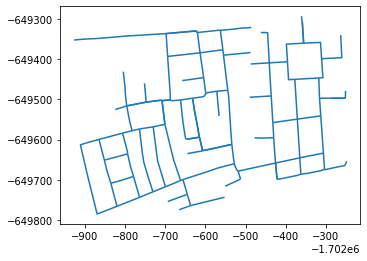

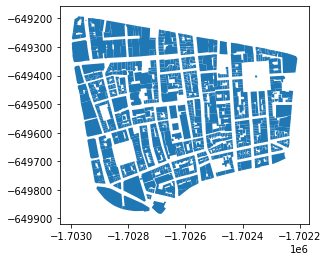

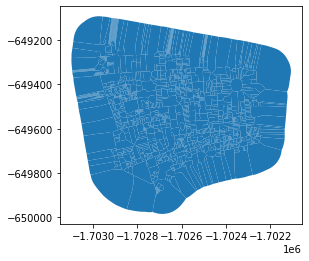

In [5]:
visualizer.plot_streets()
visualizer.plot_buildings()
visualizer.plot_tessellations()

## Measure urban features
### Dimensions

In [6]:
analyzer.compute_buildings_area()
analyzer.compute_tessellation_area()
analyzer.compute_street_length()
#analyzer.compute_street_width()
#analyzer.compute_street_width_deviation()

Computing buildings' area...
Computing tessellation area...
Computing street length...


### Shape

In [7]:
analyzer.compute_building_eri() # Equivalent Rectangle Index
analyzer.compute_building_elongation()
analyzer.compute_building_convexity()
analyzer.compute_streets_linearity()

Computing building's Equivalent Rectangular Index (ERI)...
Computing building's elongation...
Computing building's convexity...
Computing street linearity...


### Spatial distribution

In [8]:
analyzer.compute_building_shared_walls()
analyzer.compute_building_adjacency()
analyzer.compute_building_interbuilding_distance()
analyzer.compute_tessellation_covered_area() 
analyzer.compute_tessellation_car()#covered area ratio

Computing building's shared walls ratio...
Computing building adjacency...
Computing building's interbuilding distance...
Computing tessellation covered area...
Computing tessellation car ratio...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:23: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.lower() == "polygon":
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "linestring":
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/_contW_lists.py:28: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "multilinestring":


### Connectivity

In [9]:
analyzer.compute_street_closeness_centrality()

Computing street closeness and meshedness...


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

### Link and standardize features of buildings, streets, and tessellations
Understand the context of each features by measuring the first, second, and third quartiles withing 3 topological steps (3 ordered neighbours) - if the first, second and  third buildings are the same, there is the homogeneous units.

In [10]:
analyzer.compute_merged_percentiles()
analyzer.compute_standardized_percentiles()

Merging buildings and nodes...


  0%|          | 0/1097 [00:00<?, ?it/s]

Merging all datasets...
Computing merged percentiles...
Computing standardized percentiles...


## Clustering

In [11]:
analyzer.do_urban_type_clustering(6)

Performing clustering with 6 labels...
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.326 seconds.
K=3 fitted in 0.199 seconds.
K=4 fitted in 0.492 seconds.
K=5 fitted in 0.434 seconds.


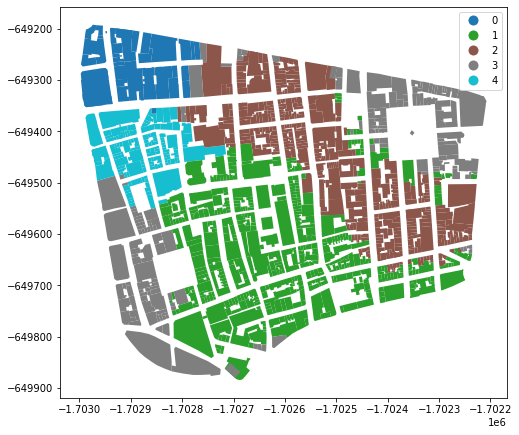

In [12]:
visualizer.plot_urban_types()

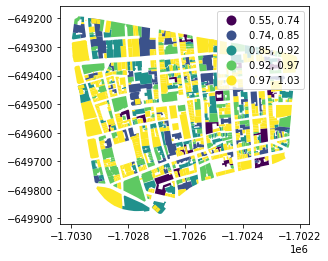

In [13]:
visualizer.plot_eri()

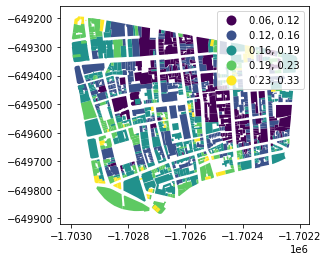

In [14]:
visualizer.plot_adjacency()

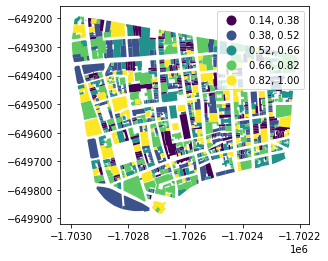

In [15]:
visualizer.plot_elongation()

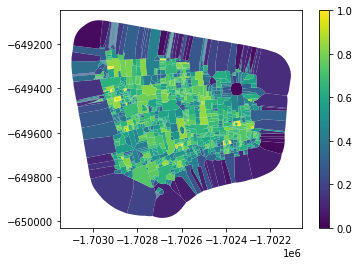

In [16]:
visualizer.plot_tessellations_car()